[1] "ABA_Col_1"   "ABA_Col_2"   "ABA_Col_3"   "ABA_g7g8_1"  "ABA_g7g8_2" 
 [6] "ABA_g7g8_3"  "Mock_Col_1"  "Mock_Col_2"  "Mock_Col_3"  "Mock_g7g8_1"
[11] "Mock_g7g8_2" "Mock_g7g8_3"

[1] "ABA_Col_1"   "ABA_Col_2"   "ABA_Col_3"   "ABA_g7g8_1"  "ABA_g7g8_2" 
 [6] "ABA_g7g8_3"  "Mock_Col_1"  "Mock_Col_2"  "Mock_Col_3"  "Mock_g7g8_1"
[11] "Mock_g7g8_2" "Mock_g7g8_3"

[1] "ABA_Col_1"   "ABA_Col_2"   "ABA_Col_3"   "ABA_g7g8_1"  "ABA_g7g8_2" 
 [6] "ABA_g7g8_3"  "Mock_Col_1"  "Mock_Col_2"  "Mock_Col_3"  "Mock_g7g8_1"
[11] "Mock_g7g8_2" "Mock_g7g8_3"

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


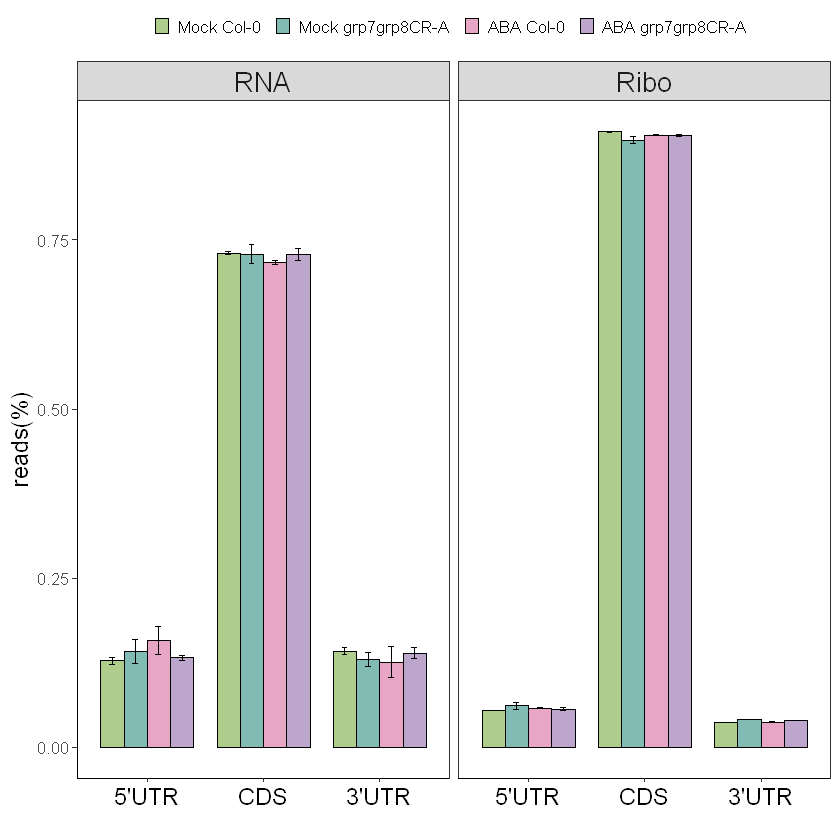

In [1]:
# S_fig5

library(ggplot2)
library(reshape2)
library(patchwork)


UTR3 <- read.csv("data/Riboseq_3UTR.featurecount1.txt",header = T,sep = "\t",row.names = 1)
UTR5 <- read.csv("data/Riboseq_5UTR.featurecount1.txt", header = T,sep = "\t",row.names = 1)
CDS <- read.csv("data/Riboseq_CDS.featurecount1.txt", header = T,sep = "\t",row.names = 1)


colnames(UTR3)
colnames(UTR5)
colnames(CDS)
ribo <- rbind(colSums(UTR5),colSums(CDS),colSums(UTR3))
ribo <- rbind(ribo,colSums(ribo))
rownames(ribo) <- c("5'UTR","CDS","3'UTR","sum")

ribo1 <- t(apply(ribo, 1, function(x) x / ribo[4, ]))

ribo1 <- melt(ribo1[1:3,])
ribo1$sample <- "Ribo"




UTR3 <- read.csv("data/RNAseq_3UTR.featurecount1.txt",header = T,sep = "\t",row.names = 1)
UTR5 <- read.csv("data/RNAseq_5UTR.featurecount1.txt", header = T,sep = "\t",row.names = 1)
CDS <- read.csv("data/RNAseq_CDS.featurecount1.txt", header = T,sep = "\t",row.names = 1)

rna <- rbind(colSums(UTR5),colSums(CDS),colSums(UTR3))

rna <- rbind(rna,colSums(rna))
rownames(rna) <- c("5'UTR","CDS","3'UTR","sum")

rna1 <- t(apply(rna, 1, function(x) x / rna[4, ]))

rna1 <- melt(rna1[1:3,])
rna1$sample <- "RNA"




data <- rbind(rna1, ribo1)
#data <- rna1
data$Var2 <- as.character(data$Var2)

data[which(data$Var2=="Mock_Col_1"),"Var2"] <- "Mock.Col"
data[which(data$Var2=="Mock_Col_2"),"Var2"] <- "Mock.Col"
data[which(data$Var2=="Mock_Col_3"),"Var2"] <- "Mock.Col"
data[which(data$Var2=="Mock_g7g8_1"),"Var2"] <- "Mock.g7g8"
data[which(data$Var2=="Mock_g7g8_2"),"Var2"] <- "Mock.g7g8"
data[which(data$Var2=="Mock_g7g8_3"),"Var2"] <- "Mock.g7g8"
data[which(data$Var2=="ABA_Col_1"),"Var2"] <- "ABA.Col"
data[which(data$Var2=="ABA_Col_2"),"Var2"] <- "ABA.Col"
data[which(data$Var2=="ABA_Col_3"),"Var2"] <- "ABA.Col"
data[which(data$Var2=="ABA_g7g8_1"),"Var2"] <- "ABA.g7g8"
data[which(data$Var2=="ABA_g7g8_2"),"Var2"] <- "ABA.g7g8"
data[which(data$Var2=="ABA_g7g8_3"),"Var2"] <- "ABA.g7g8"

mean <- aggregate(data$value, by=list(data$sample, data$Var1, data$Var2), FUN=mean)
sd <- aggregate(data$value, by=list(data$sample, data$Var1, data$Var2), FUN=sd)
mean$sd <- sd$x

mean$Group.3<-factor(mean$Group.3,
                     levels = c("Mock.Col","Mock.g7g8","ABA.Col", "ABA.g7g8"),
                     labels = c("Mock Col-0","Mock grp7grp8CR-A","ABA Col-0", "ABA grp7grp8CR-A"))
mean$Group.2<-factor(mean$Group.2,
                     levels = c("5'UTR", "CDS","3'UTR"),
                     labels = c("5'UTR", "CDS","3'UTR"))
mean$Group.1<-factor(mean$Group.1,
                     levels = c("RNA", "Ribo"))
# rna <- subset(mean, Group.1=="RNA")
# ribo <- subset(mean, Group.1=="Ribo")



#pdf("reads_region_distribution_barplot_bar.pdf",width = 6,height = 4)
ggplot(mean, aes(x=Group.2, y=x, fill=Group.3)) +
  geom_bar(stat="identity", position=position_dodge(),color="black", width=.8, size=0.2) +
  geom_errorbar(aes(ymin = x - sd, ymax = x + sd), 
                width = 0.2, 
                position = position_dodge(0.8)) +
  scale_fill_manual(values = c("#AECC8B","#81BBB3","#E8A6C6","#BDA6CB")) +
  ylab("reads(%)")+
  xlab("")+
  #ggtitle("RNAseq")+
  #scale_x_discrete(limits = c("3'UTR_Exons", "5'UTR_Exons","CDS_Exons"),labels = c("3'UTR", "5'UTR","CDS"))+
  theme_bw()+
  #scale_legend_discrete(limits = c("ABA.Col", "ABA.g7g8","Mock.Col","Mock.g7g8"),labels = c("ABA Col-0", "ABA grp7grp8CR-A","Mock Col-0","Mock grp7grp8CR-A"))+
  theme(panel.grid=element_blank(),
        axis.line = element_line(colour = "black"),
        # panel.border = element_blank(),
        legend.title = element_blank(),
        legend.text = element_text(size = 10),
        legend.position = "top",
        legend.key.size = unit(0.3,"cm"),
        # axis.line.x=element_line(linewidth=1),
        # axis.line.y=element_line(linewidth=1),
        axis.title.y =element_text(size=14),
        axis.text.x =element_text(size=14,color="black"),
        axis.text.y =element_text(size=10),
        strip.text.x = element_text(size = 16),
        #axis.title.y=element_text(size=14),
        plot.title = element_text(hjust = 0.5))+
  facet_grid(~Group.1)

#dev.off()